<a href="https://colab.research.google.com/github/Shiyi-Xia/NLP_ESS_2022/blob/main/Tutorial_Four_(R)_Introduction_to_Text_Classification_with_Keras_%26_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Text Classification with Keras & Tensorflow

## Douglas Rice


*This tutorial was originally created by Burt Monroe for his prior work with the Essex Summer School. I've updated and modified it.*

In this notebook, we'll develop our first neural network model. By the end of the notebook, you should be familiar with:


1. Set up a feed-forward neural network.
2. Evaluate a feed-forward neural network.
3. Update and modify a feed-forward neural network.



#### Setup Instructions:
This notebook was designed to run in a clean R runtime within Google Colab. Before running any of the code below, go up to the menu at the top of the window and click "runtime," then, from the dropdown, click "Disconnect and Delete Runtime". Then, reconnect. That should get everything set up to run smoothly.

## Tensorflow & Keras

We'll be using Tensorflow [here](https://www.tensorflow.org/) and Keras [here](https://keras.io/) for building neural network models. Tensorflow is free and open-source (obviously) now, but it was initially developed internally by the folks at Google for their own neural network / AI development tasks. It was released publicly in 2015. Keras is the API built on top of TensorFlow; the idea is to make it "simpler" to build, evaluate, and compare complex neural networks. 

Support for Keras and Tensorflow is much better in Python; R actually leverages the package `reticulate` (get it?) to work with Python from the R environnment. That necessitates some extra steps here to get everything set up cleanly. This first setup step takes 3 minutes.

## Setup

In [ ]:
install.packages("keras") # install R library for keras; this installs dependencies we'll need, including tensorflow

library(tensorflow) # load R library for tensorflow
library(keras) # load R library for keras

tf$constant("Hello Tensorflow") # check that tensorflow is working

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’


Loaded Tensorflow version 2.8.2



tf.Tensor(b'Hello Tensorflow', shape=(), dtype=string)

## Text Classification with a Deep Feedforward Network

### Load the IMDB data

We'll work with the IMDB review dataset that comes with keras. We're interested in the actual text (rather than just the representation of the text), so we need to do some work to map words to the indices. That ensures we'll be able to look at the text/effects later on with more meaningful insights than "word indexed 501 is associated with much more positive reviews!" 

The indices, except for 0 which corresponds to UNK_, start with "the" and get less frequent as the index increases. So we know the first 5000 words are the most frequent.

In [ ]:
imdb <- keras::dataset_imdb(num_words = 5000)
train_data <- imdb$train$x
train_labels <- imdb$train$y
test_data <- imdb$test$x
test_labels <- imdb$test$y

In [ ]:
word_index <- dataset_imdb_word_index()
reverse_word_index <- names(word_index)
names(reverse_word_index) <- word_index
decoded_review <- sapply(train_data[[1]], 
                         function(index) {
                           word <- if (index >= 3)
reverse_word_index[[as.character(index - 3)]]
                           if (!is.null(word)) word else "?"
                           })
decoded_review

[1] "?"          "this"       "film"       "was"        "just"      
  [6] "brilliant"  "casting"    "location"   "scenery"    "story"     
 [11] "direction"  "everyone's" "really"     "suited"     "the"       
 [16] "part"       "they"       "played"     "and"        "you"       
 [21] "could"      "just"       "imagine"    "being"      "there"     
 [26] "robert"     "?"          "is"         "an"         "amazing"   
 [31] "actor"      "and"        "now"        "the"        "same"      
 [36] "being"      "director"   "?"          "father"     "came"      
 [41] "from"       "the"        "same"       "scottish"   "island"    
 [46] "as"         "myself"     "so"         "i"          "loved"     
 [51] "the"        "fact"       "there"      "was"        "a"         
 [56] "real"       "connection" "with"       "this"       "film"      
 [61] "the"        "witty"      "remarks"    "throughout" "the"       
 [66] "film"       "were"       "great"      "it"         "was"       
 [71] "just"       "brilliant"  "so"         "much"       "that"      
 [76] "i"          "bought"     "the"        "film"       "as"        
 [81] "soon"       "as"         "it"         "was"        "released"  
 [86] "for"        "?"          "and"        "would"      "recommend" 
 [91] "it"         "to"         "everyone"   "to"         "watch"     
 [96] "and"        "the"        "fly"        "?"          "was"       
[101] "amazing"    "really"     "cried"      "at"         "the"       
[106] "end"        "it"         "was"        "so"         "sad"       
[111] "and"        "you"        "know"       "what"       "they"      
[116] "say"        "if"         "you"        "cry"        "at"        
[121] "a"          "film"       "it"         "must"       "have"      
[126] "been"       "good"       "and"        "this"       "definitely"
[131] "was"        "also"       "?"          "to"         "the"       
[136] "two"        "little"     "?"          "that"       "played"    
[141] "the"        "?"          "of"         "norman"     "and"       
[146] "paul"       "they"       "were"       "just"       "brilliant" 
[151] "children"   "are"        "often"      "left"       "out"       
[156] "of"         "the"        "?"          "list"       "i"         
[161] "think"      "because"    "the"        "stars"      "that"      
[166] "play"       "them"       "all"        "grown"      "up"        
[171] "are"        "such"       "a"          "big"        "?"         
[176] "for"        "the"        "whole"      "film"       "but"       
[181] "these"      "children"   "are"        "amazing"    "and"       
[186] "should"     "be"         "?"          "for"        "what"      
[191] "they"       "have"       "done"       "don't"      "you"       
[196] "think"      "the"        "whole"      "story"      "was"       
[201] "so"         "lovely"     "because"    "it"         "was"       
[206] "true"       "and"        "was"        "someone's"  "life"      
[211] "after"      "all"        "that"       "was"        "?"         
[216] "with"       "us"         "all"

Now, we need to convert the IMDB dataset into something that's well-tailored for our application. Notice that we have lots of objects in the environment right now now: 


*   `train_data`: our data for training the model, stored as an array where each document is represented by a sequence of numbers that correspond to the indices. 
*   `test_data`: our data for testing the model, stored as an array where each document is represented by a sequence of numbers that correspond to the indices.
* `train_labels`: the labels (i.e. what we are predicting) for training our model, stored as an array.
* `test_labels`: the labels for testing our model, stored as an array.

We need to convert these to more usable formats for training and more particularly for *evaluating* the model. Therefore, we define a function (`vectorize_sequences`) that creates, for each row (i.e., document), a vector of length 5000 (or the number of words) where each entry indicates if a word was present in that document or not. We apply that function to the training and test dataframes, yielding `x_train` and `x_test`. We call these new matrices "multihot" representations for each document; they are a document-presence matrix of 1s and 0s.

In [ ]:
vectorize_sequences <- function(sequences, dimension = 5000) {
  results <- matrix(0, nrow = length(sequences), ncol = dimension)
  for (i in 1:length(sequences))
    results[i, sequences[[i]]] <- 1 
  results
}

x_train <- vectorize_sequences(train_data)
x_test <- vectorize_sequences(test_data)


The train and test labels are already stored in a format that is closer to what we want (i.e., we don't need to go about dealing with the indexing). 

In [ ]:
# Also change labels from integer to numeric
y_train <- as.numeric(train_labels)
y_test <- as.numeric(test_labels)

Finally, when we train the neural network, the model evaluates as it goes. That means we should identify a "validation" set from our training set; this way, the neural network will be evaluated twice. First with this held-out, validation set in training, and second by an "invisible" test set that we retain for the final stage. Here, we'll pull aside 10,000 of our training documents (overkill probably) to use as validation data during the training phase.

In [ ]:
val_indices <- 1:10000 # not great practice if these are ordered

x_val <- x_train[val_indices,]
partial_x_train <- x_train[-val_indices,]
y_val <- y_train[val_indices]
partial_y_train <- y_train[-val_indices]

## Define the model architecture.

With all of that prep out of the way, we can finally turn to specifying a model. To do so, we need to specify a model architecture. We are starting with a basic use case, the feedforward network. A feedforward neural network can be built from simple layer building blocks from Keras using `models.Sequential`. 

We're building a "deep" model, so we define three keras layers. For all of them, we use "dense" layers, meaning every node in each layer is connected to every node in the next. For the first layer -- the layer that takes the inputs -- we need to specify the "input shape", which in this case is a one-dimensional vector of length 5000. We'll make each of our hidden layers consist of 16 nodes, with "relu" activation functions. (ReLU is short for **Re**ctified **L**inear **U**nit, and is generally taken to be the best default activation function for hidden layers.) Our output layer will consist of a single node, with a sigmoid (logistic) activation function outputting a probability of being positive.


In [ ]:
model <- keras_model_sequential() %>%
  layer_dense(units = 16, activation = "relu", input_shape = 5000) %>%
  layer_dense(units = 16, activation = "relu") %>%
  layer_dense(units = 1, activation = "sigmoid")

summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2 (Dense)                    (None, 16)                      80016       
 dense_1 (Dense)                    (None, 16)                      272         
 dense (Dense)                      (None, 1)                       17          
Total params: 80,305
Trainable params: 80,305
Non-trainable params: 0
________________________________________________________________________________


The summary describes the structure we've set up. The number of parameters reflects the number of connections we are drawing (5,000 to 16 = 8,000; 16 to 16 = 256, 16 to 1 = 16). Note that at each stage, there are 16 extra parameters than there are nodes. This is because of bias parameters for each node, which effectively equates to one extra "always on" input.

## Compile and Fit your model - Optimizer, Loss, Metrics

The next step to compiling our model is specifying additional information about estimation now that we have the structure. These are our loss function, what optimizer we wish to use, and what metrics we want to keep track of. The "adam" optimizer is generally taken to be the default, but you might wish to try others. We'll use a binary cross-entropy loss function, which is exactly the same as the logit loss function from GLMs. We also tell it what performance metrics to track.


In [ ]:
model %>% compile(
  optimizer = "adam",
  loss = "binary_crossentropy",
  metrics = c("accuracy")
)

history <- model %>% fit(
  partial_x_train,
  partial_y_train,
  epochs = 50,
  batch_size = 512,
  validation_data = list(x_val, y_val),
  verbose = 2
)

Let's plot the loss and accuracy metrics from training for both the training and validation sets. 

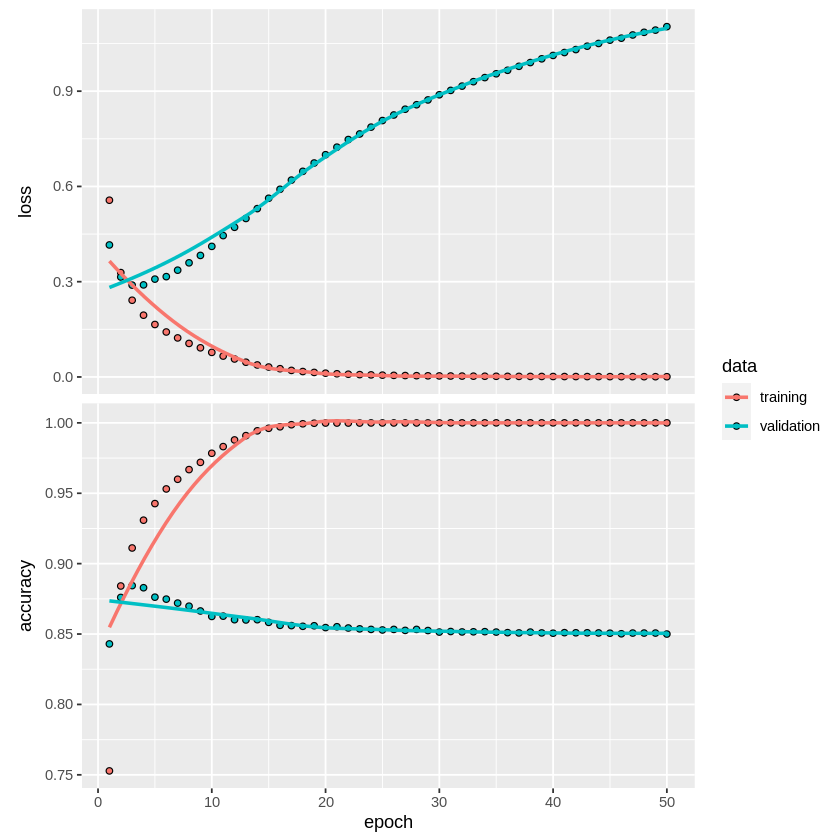

In [ ]:
plot(history)


## Address overfitting

Overfitting. It basically memorized the training data. There are a number of things we can do, including regularizing weights and dropout, which we'll discuss later. For now, we can (manually) do "early stopping" by restarting and fitting at a smaller number of epochs. On different runs, the loss is minimized at 4 or 5 epochs.

In [ ]:
model <- keras_model_sequential() %>%
  layer_dense(units = 16, activation = "relu", input_shape = 5000) %>%
  layer_dense(units = 16, activation = "relu") %>%
  layer_dense(units = 1, activation = "sigmoid")

model %>% compile(
  optimizer = "adam",
  loss = "binary_crossentropy",
  metrics = c("accuracy")
)

history <- model %>% fit(
  partial_x_train,
  partial_y_train,
  epochs = 4,
  batch_size = 512,
  validation_data = list(x_val, y_val),
  verbose = 2
)

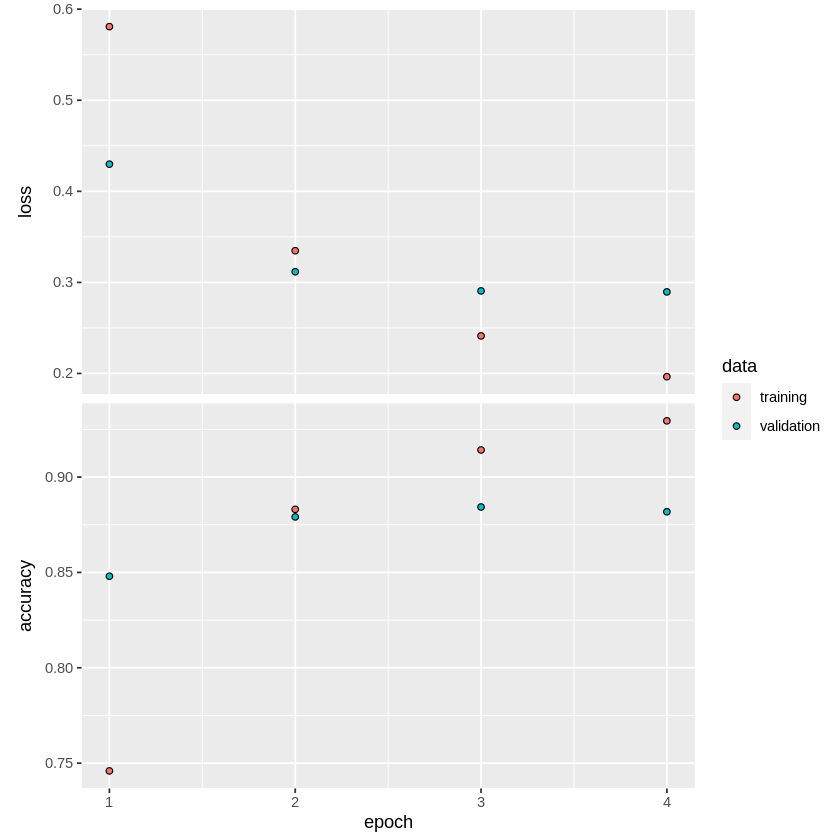

In [ ]:
plot(history)

# Evaluate with Out-of-Sample Data

Alright, the early stopping seems to have alleviated the overfitting. We can turn, then, to evaluating our model on the out-of-sample data that we put aside for testing earlier. To do so, we pass the `x_text` and `y_test` objects to our model.

In [ ]:
results <- model %>% evaluate(x_test, y_test)
results

loss  accuracy 
0.3010618 0.8762000

In the test data, we get accuracy of about 87.5% (it varies a bit with the stochastic element here). 

## Interpret

So, what happened there? What is the model learning? It learned a function that converts 5000 inputs into 16 hidden / latent / intermediate numbers, then converts those 16 into a different 16 intermediate numbers, and then those into 1 number at the output. Those intermediate functions are nonlinear, otherwise there wouldn't be any gain from stacking them together. But we can get an approximate idea of how these inputs map to the single output by treating each layer as linear and multiplying the weights through: $W^{(5000\times 1)}_{io} \approx W_{i1}^{(5000\times 16)} \times W_{12}^{(16\times 16)} \times W_{2o}^{(16\times 1)}$. Those aggregate weights can give us an approximate idea of the main marginal effect of each input. (This ignores the bias weights at each layer, and the rectified/zeroed out part of the relu activation functions. This will not work, generally speaking, in more complex models or contexts.)


In [ ]:
model.weights.approx <- (get_weights(model)[[1]] %*% get_weights(model)[[3]]  %*% get_weights(model)[[5]])[,1]
top_words <- reverse_word_index[as.character(1:5000)]
names(model.weights.approx) <- c("<PAD>","<START>","<UNK>",top_words[1:4997])

as.data.frame(sort(model.weights.approx, dec=T)[1:20])

as.data.frame(sort(model.weights.approx, dec=F)[1:20])

,"sort(model.weights.approx, dec = T)[1:20]"
,<dbl>
7,0.8031343
excellent,0.7963285
8,0.7087713
wonderfully,0.7007044
appreciated,0.6900814
perfect,0.6464668
gem,0.6353056
incredible,0.6167813
great,0.6161872


,"sort(model.weights.approx, dec = F)[1:20]"
,<dbl>
awful,-0.8347870
worst,-0.8025096
poor,-0.7639583
boring,-0.7361256
fails,-0.7301572
disappointment,-0.7294995
poorly,-0.7263686
disappointing,-0.7130506
waste,-0.7103333


These make a lot of sense! "7" and "8" are interesting to note. They come from reviews that expliclty include references to the rating (so the reviewer ends a review by writing "7 out of 10"). 

That means the entire ecosystem of imdb-data-sentiment-classifiers (thousands of examples) are solving a much easier problem than it superficially appears to be. Some of the reviews end with the text summarizing the rating with a number out of 10! And then use that to "predict" whether the review is positive or negative (which has been labeled based on the 10 point scale rating in the first place).

In [ ]:
options(jupyter.plot_scale=1)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“2 x values <= 0 omitted from logarithmic plot”


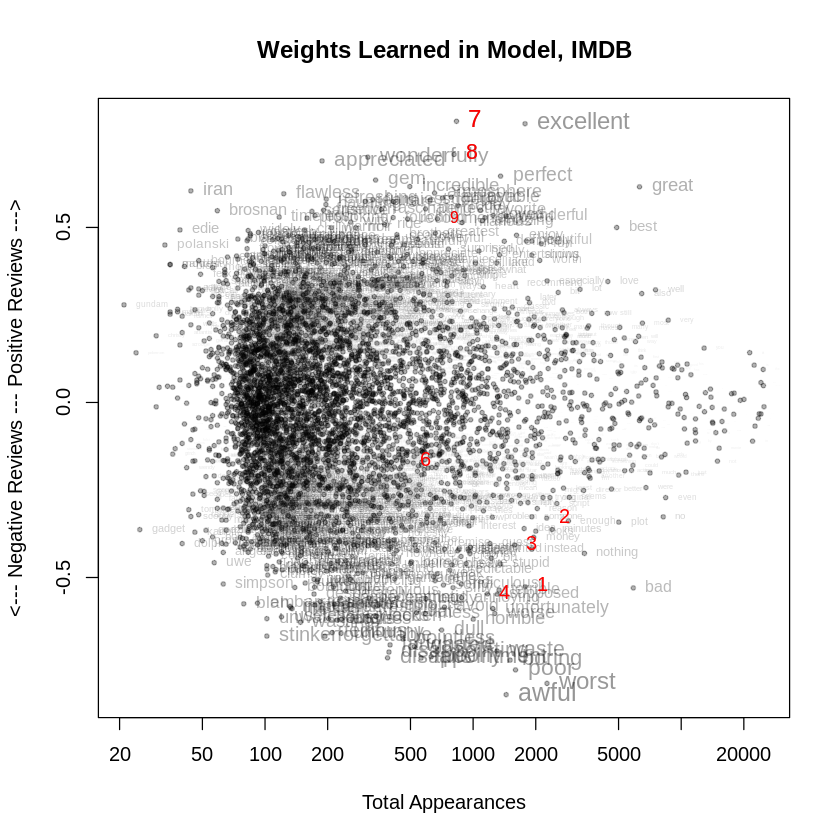

In [ ]:
colnames(x_train) <- names(model.weights.approx)
# Plot weights
plot(colSums(x_train),model.weights.approx, pch=19, col=rgb(0,0,0,.3), cex=.5, log="x", main="Weights Learned in Model, IMDB", ylab="<--- Negative Reviews --- Positive Reviews --->", xlab="Total Appearances")
text(colSums(x_train),model.weights.approx, names(model.weights.approx),pos=4,cex=1.5*abs(model.weights.approx), col=rgb(0,0,0,.5*abs(model.weights.approx)))
text(colSums(x_train[,c("1","2","3","4","5","6","7","8","9")]),model.weights.approx[c("1","2","3","4","5","6","7","8","9")], names(model.weights.approx[c("1","2","3","4","5","6","7","8","9")]),pos=4,cex=1.5*model.weights.approx[c("1","2","3","4","5","6","7","8","9")], col=rgb(1,0,0,1))


So, we successfully built a deep feedforward network for text classification, but it showed only minimal improvement over a simpler model. In subsequent notebooks, we'll see if we can improve through other changes including dropout and regularization of weights.

## Practice Exercise: 

1. See if you can improve performance through changes in the architecture (number of layers, number of nodes, activation functions - https://keras.io/api/layers/activations/) or training options (optimizer - see https://keras.io/api/optimizers/, or loss function - https://keras.io/api/losses/)

2. Why is the current model overfitting?